In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
%matplotlib inline

ModuleNotFoundError: No module named 'factor_analyzer'

In [6]:
data = pd.read_csv("high_diamond_ranked_10min.csv")
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [7]:
data.drop('gameId', axis=1, inplace=True)

In [18]:
blue=[]
red=[]
for col in list(data):
    if(col[0]=='r'):
        red.append(col)
    if(col[0]=='b'):
        blue.append(col)

In [19]:
blue

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

In [31]:
blue_data=data[blue]
red.append("blueWins")
red_data=data[red]

In [42]:
blue_corr = blue_data.corr()['blueWins'][:].sort_values(ascending=False).to_frame()
blue_corr = blue_corr.drop(blue_corr.index[-1])

Text(0.5, 0, 'blueWins')

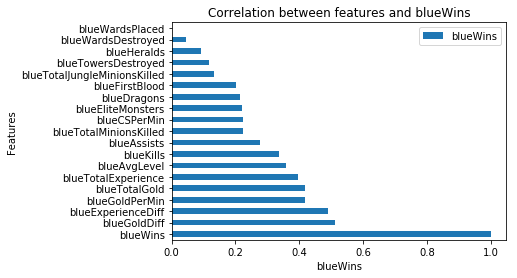

In [43]:
blue_corr.plot(kind="barh")
plt.title("Correlation between features and blueWins")
plt.ylabel("Features")
plt.xlabel("blueWins")

# Red Correlation

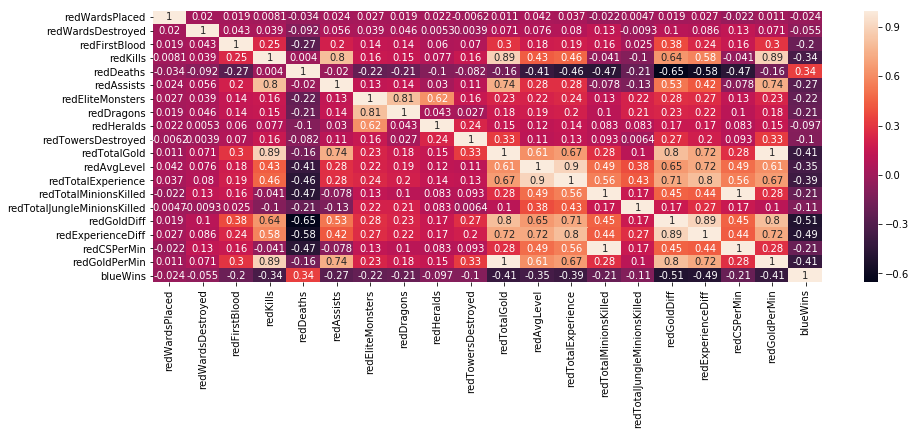

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(red_data.corr(),annot=True)

In [24]:
red_data.drop(['redWardsPlaced','redWardsDestroyed','redFirstBlood','redHeralds','redTowersDestroyed','redTotalJungleMinionsKilled','blueWins'],axis=1,inplace=True)

/Users/sunyupei/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Blue Correlation

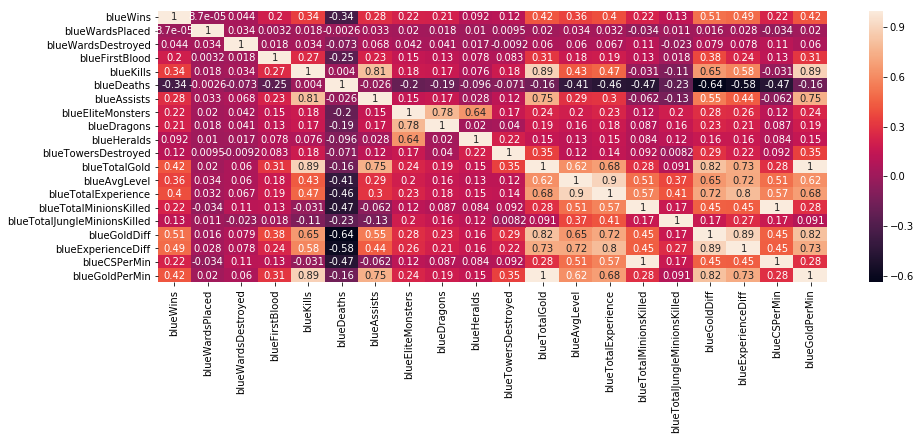

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(blue_data.corr(),annot=True)

In [27]:
blue_data.drop(['blueTotalJungleMinionsKilled','blueWardsPlaced','blueWardsDestroyed','blueFirstBlood','blueHeralds','blueTowersDestroyed'],axis=1,inplace=True)

In [82]:
data_cleaned=pd.concat([blue_data,red_data],axis=1)
data_cleaned
list(blue_data.columns)

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

# Logistic Regression

In [45]:
x=data_cleaned.drop('blueWins',axis=1)
y=data_cleaned['blueWins']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [46]:
logisticRegr = LogisticRegression()

In [47]:
logisticRegr.fit(x_train, y_train)

/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7157894736842105


# SVM

In [61]:
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [62]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7222672064777328


# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 
#test_data_predicted = knn.predict(x_test)
#print(accuracy_score(test_data_predicted, test_labels))
score = knn.score(x_test,y_test)
print(score)

0.6809716599190283


In [71]:
logistic_prob = logisticRegr.predict_proba(x_test)
logistic_prob = logistic_prob[:,-1]
svm_predict = clf.predict(x_test)
svm_prob = clf.predict_proba(x_test)
knn_predict = knn.predict(x_test)
knn_prob = knn.predict_proba(x_test)
#logistic_prob = logistic_prob[:,-1]
svm_prob = svm_prob[:,-1]
knn_prob = knn_prob[:,-1]

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_prob)

In [69]:
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svm_prob)

In [72]:
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_prob)

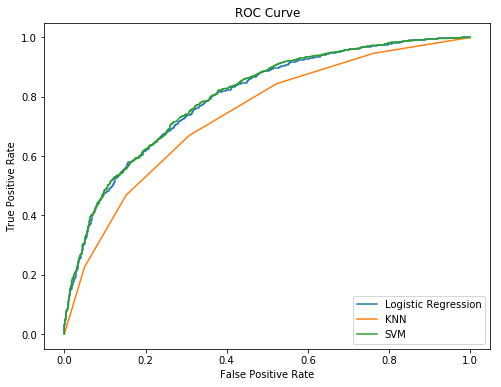

In [80]:
plt.figure(figsize=(8,6))
plt.plot(logistic_fpr,logistic_tpr, linestyle = '-', label = 'Logistic Regression')
plt.plot(knn_fpr,knn_tpr, label = 'KNN')
plt.plot(svc_fpr,svc_tpr,  label = 'SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [89]:
# PCA

In [166]:
df_clean_scaled = sc.fit_transform(df_clean)
df_clean=data.copy()
df_clean.head(10)

/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,1,18,0,0,5,3,6,1,1,0,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,1,18,3,1,7,6,7,1,1,0,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,0,16,2,0,5,13,3,0,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,0,16,3,0,7,7,8,0,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,1,13,1,1,4,5,5,1,1,0,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [99]:
#scaling our data similar to when doing FA:
sc=StandardScaler()
df_clean_scaled = sc.fit_transform(df_clean)

#converting it back into a panda:
df_clean_scaled = pd.DataFrame(df_clean_scaled, columns = list(df_clean.columns))
df_clean_scaled.head()

/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,-0.998079,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,...,-0.198353,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,-0.998079,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,...,4.412301,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
2,-0.998079,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,...,-0.198353,0.533909,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909
3,-0.998079,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,...,-0.198353,-0.007406,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406
4,-0.998079,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,...,-0.198353,0.613731,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731


In [101]:
#Before we decide how many PCA components, we need to know the criteria for how many components we should maintain. The cumulative variance to preserve our data seems to vary, but we'll choose the amount of components where 70-90% of the total variance is explained (Siswadi, Muslim & Bakhtiar, 2016). We'll explain in the discussion at the end of this of the alternative methods that determine how many PCA components to choose.

In [103]:
eig_vals, eig_vecs = np.linalg.eig(df_clean_scaled.corr())
count_pca_floor = float('inf')
count_pca_ceiling = 0
total_pca = sum(eig_vals)
total_pca_running = 0
i = 0
eig_vals = np.sort(eig_vals)[::-1]
print(eig_vals)
while total_pca_running <= 0.90:
    if total_pca_running >= 0.70 and count_pca_floor == float('inf'):
        count_pca_floor = min(count_pca_floor,i)
    if total_pca_running + eig_vals[i]/total_pca > 0.90:
        break
    total_pca_running += eig_vals[i]/total_pca
    count_pca_ceiling += 1
    i += 1
    
(count_pca_floor,count_pca_ceiling)

[ 1.27653065e+01+0.00000000e+00j  4.61346346e+00+0.00000000e+00j
  2.66378121e+00+0.00000000e+00j  2.44855196e+00+0.00000000e+00j
  1.88405710e+00+0.00000000e+00j  1.48153437e+00+0.00000000e+00j
  1.37390269e+00+0.00000000e+00j  1.29184982e+00+0.00000000e+00j
  1.25675698e+00+0.00000000e+00j  1.12873212e+00+0.00000000e+00j
  1.04741782e+00+0.00000000e+00j  1.02959756e+00+0.00000000e+00j
  8.92914460e-01+0.00000000e+00j  8.13783241e-01+0.00000000e+00j
  7.93922314e-01+0.00000000e+00j  7.58853866e-01+0.00000000e+00j
  7.00805502e-01+0.00000000e+00j  4.84910794e-01+0.00000000e+00j
  4.03851413e-01+0.00000000e+00j  3.91527538e-01+0.00000000e+00j
  2.35591032e-01+0.00000000e+00j  1.88464429e-01+0.00000000e+00j
  1.23758190e-01+0.00000000e+00j  8.63594548e-02+0.00000000e+00j
  8.05541630e-02+0.00000000e+00j  5.97519846e-02+0.00000000e+00j
  1.18118944e-13+0.00000000e+00j  5.36951401e-15+0.00000000e+00j
  2.37764272e-16+0.00000000e+00j  3.16339381e-17+0.00000000e+00j
 -1.32061586e-17+2.708720

(8, 14)

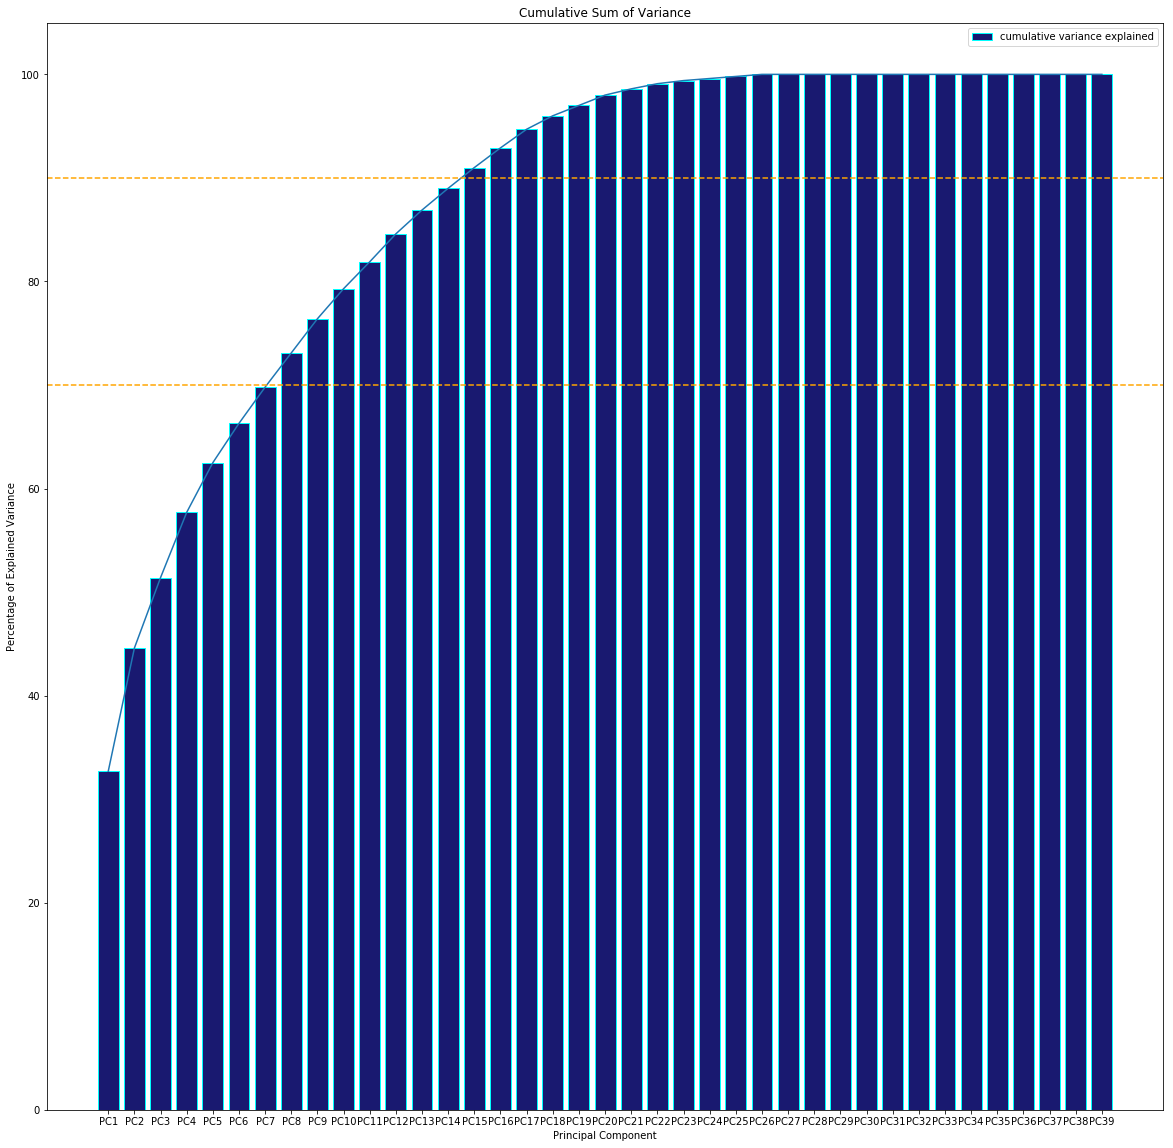

In [104]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_clean_scaled)
pca_data = pca.transform(df_clean_scaled)
percent_var = np.round(pca.explained_variance_ratio_.cumsum()*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percent_var)+1)]
plt.figure(figsize=(20,20))
#cumulative variance explained:
plt.bar(x=range(1, len(percent_var)+1), height = percent_var, tick_label = labels, color='midnightblue', edgecolor='aqua', label = 'cumulative variance explained')
sns.lineplot(x=range(1, len(percent_var)+1), y = percent_var)
#benchmark of 70-90% variance explained:
plt.axhline(70.0, color = 'orange', linestyle="--")
plt.axhline(90.0, color = 'orange', linestyle="--")
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Sum of Variance')
plt.show()

In [105]:
#The cumulative variance explained shows there is evidence to keep at least 9 Principal Components. Becuase of this high number, we'll be unable to utilise one of PCA's advantages: its visualisations (best used for components under 4 since the human eye sees in 3D).

In [106]:
#We're going to start looking at the eigenvalues in the first few compoments and start to identify the features that correspond with the Components:

In [107]:
#The output below suggests Component 1 is about Gold and Experience Difference


In [108]:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[0])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
35,redGoldDiff,0.274110
16,blueGoldDiff,0.274110
36,redExperienceDiff,0.263039
17,blueExperienceDiff,0.263039
19,blueGoldPerMin,0.223971
11,blueTotalGold,0.223971
30,redTotalGold,0.220401
38,redGoldPerMin,0.220401
13,blueTotalExperience,0.210732
32,redTotalExperience,0.210368


In [110]:
#Component 2:
#The output below suggests Component 2 is about Kills/Deaths/Assists (K/D/A)

In [111]:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[1])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
5,blueDeaths,0.315964
23,redKills,0.315964
4,blueKills,0.309355
24,redDeaths,0.309355
25,redAssists,0.279286
6,blueAssists,0.272253
18,blueCSPerMin,0.228246
14,blueTotalMinionsKilled,0.228246
37,redCSPerMin,0.226972
33,redTotalMinionsKilled,0.226972


In [112]:
#Component 3:

#The output below suggests Component 3 is about Elite Monster Kills. Interestingly, the eigenvalue for Herald kills is relatively small compared to Dragon kills, so we could conclude Component 3 is actually about Dragons taken instead.

In [113]:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[2])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
26,redEliteMonsters,0.468713
27,redDragons,0.454373
8,blueDragons,0.451629
7,blueEliteMonsters,0.446045
28,redHeralds,0.190641
9,blueHeralds,0.158586
18,blueCSPerMin,0.111151
14,blueTotalMinionsKilled,0.111151
34,redTotalJungleMinionsKilled,0.109092
13,blueTotalExperience,0.086116


In [114]:
#We can repeat the above steps to obtain the rest of the interpretations of our Components:

#PC1: Gold/Exp Diff

#PC2: K/D/A

#PC3: Dragons Killed

#PC4: Experience

#PC5: Heralds Killed

#PC6: Wards destroyed

#PC7: Towers Destroyed

#PC8: Wards Placed

#PC9: Jungle Minions killed

In [115]:
#With at least 70% of cumulative variance explained, the variance being < 1 after the 9th PC & the uninterpretability after the 9th PC and the 10th PC onwards having eigenvalues < 1, there is evidence to choose 9 Principal Components.

In [116]:
#apply PCA to the number of above components:
pca9 = PCA(n_components=9)
pca9_fit = pca9.fit_transform(df_clean_scaled)
df_pca = pd.DataFrame(data = pca9_fit, columns = ['PCA' + str(i) for i in range(1,10)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.588229,2.398861,-0.060783,1.834431,-1.669322,-0.371412,-1.273773,0.438825,0.769702
1,4.217010,-0.232448,1.848516,2.081345,-0.464493,-2.561270,4.487768,0.375072,-0.554570
2,2.302858,3.253322,-2.451604,2.154115,1.816123,-0.099840,-0.261320,-0.365741,-0.607186
3,1.388393,-0.986253,-1.679583,0.129121,1.623798,0.619880,0.512777,1.969839,-0.274180
4,1.339579,-0.295282,1.658737,-0.905080,0.977439,-0.501436,-0.227254,1.478489,0.373019


In [117]:
px_train,px_test,py_train,py_test=train_test_split(pca9_fit,y,test_size=0.2,random_state=1)
PCA_LR=LogisticRegression() 

In [118]:
#Logistic Regression
PCA_LR.fit(px_train,py_train)


/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
result_PCALR=PCA_LR.predict(px_test)
print(accuracy_score(result_PCALR,py_test))

0.7611336032388664


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix_pca = confusion_matrix(py_test, result_PCALR)
print(confusion_matrix_pca)

[[755 247]
 [225 749]]


In [121]:
import statsmodels.api as sm
logit_model=sm.Logit(y,pca9_fit)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.500403
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.278    
Dependent Variable: blueWins         AIC:              9904.9574
Date:               2021-12-08 23:34 BIC:              9969.7409
No. Observations:   9879             Log-Likelihood:   -4943.5  
Df Model:           8                LL-Null:          -6847.6  
Df Residuals:       9870             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -0.4660     0.0100   -46.5060   0.0000   -0.4856   -0.4463
x2      -0.0112     0.0115    -0.9704   0.3318   -0.0338    0.0114
x3 

In [123]:
#PCA Selection methods

In [124]:
#The B2 procedure begins by doing PCA over our n × p data matrix. If we choose to retain q Principal Components, then associate one variable with each of the last p - q variables. The p - q variables are then removed (Siswadi, Muslim & Bekhtiar, 2012). This can be done as a whole p - q block or one by one and performing multiple PCAs. Jolliffe explores the distinctive ways of deleting the variables and determines deleting en bloc consistently failed to select an appropriate subset for some simple correlation structures (Joliffe, 2002, p. 138).

In [125]:
#Attempting first step of B2 method to delete the highest-loading variable of the least important PC:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[22])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
12,blueAvgLevel,0.468765
31,redAvgLevel,0.455007
36,redExperienceDiff,0.337091
17,blueExperienceDiff,0.337091
13,blueTotalExperience,0.274178
32,redTotalExperience,0.265465
25,redAssists,0.217932
6,blueAssists,0.217287
16,blueGoldDiff,0.133847
35,redGoldDiff,0.133847


In [126]:
#Highest eigenvalue of first 9 Components:



In [162]:
cols = []
for i in range(9):
    aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[i])})
    x = aa.values.tolist()
    x.sort(key = lambda x: x[1], reverse = True)
    cols.append(x[0][0])
    print(x[0][0] + " : " + str(x[0][1]))
df_b4 = df_clean_scaled[cols]+0.001*np.random.rand(9879, 9)

blueGoldDiff : 0.27411041203975844
blueDeaths : 0.31596407759691464
redEliteMonsters : 0.468713268423259
redTotalExperience : 0.33300509711602994
blueFirstBlood : 0.6114025601249887
blueHeralds : 0.5311591046280274
redHeralds : 0.4955508546398529
redHeralds : 0.40223603136873315
blueWardsDestroyed : 0.5968203500809115


In [128]:
#Performing Logistic Regression after B4 Method:

In [129]:
bx_train,bx_test,by_train,by_test=train_test_split(df_b4,y,test_size=0.2,random_state=1)
B4_LR=LogisticRegression()
B4_LR.fit(bx_train,by_train)

/Users/sunyupei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
result_B4LR=B4_LR.predict(bx_test)
print(accuracy_score(result_B4LR,by_test))

0.7398785425101214


In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix_b4 = confusion_matrix(by_test, result_B4LR)
print(confusion_matrix_b4)

[[728 274]
 [240 734]]


In [167]:
import statsmodels.api as sm
logit_model=sm.Logit(y,df_b4)
result3=logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.533078
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.231     
Dependent Variable:    blueWins          AIC:               10550.5585
Date:                  2021-12-09 00:15  BIC:               10615.3420
No. Observations:      9879              Log-Likelihood:    -5266.3   
Df Model:              8                 LL-Null:           -6847.6   
Df Residuals:          9870              LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
----------------------------------------------------------------------
blueGoldDiff         1.2747   0.0468 27.2171 0.0000    1.1829   1.3665
blu

In [ ]:
#Some of our p-values/z-scores are still unsatisfactory but much better than our initial PCA regression model.

In [165]:
#Conclusion: Gold accumulation through early kills/solid last-hitting as well as securing early dragon kills maximises your chances in winning your League of Legends games